<a href="https://colab.research.google.com/github/kweteM/MyColabproject3/blob/main/Customer_Churn_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries**

**Data Handling**
* The **Pandas** library: for data manipulation and analysis for structured data (CSV).

* The **NumPy** library: for numerical computing, providing support for arrays, matrices, and mathematical operations.

**Data Visualization**

* The**Matplotlib** library: for plotting and creating charts and visualizations.
* The **Seaborn** library: for a statistical visualization library built on top of Matplotlib that makes it easier to create aesthetically pleasing and informative charts.

**Machine Learning Utilities**

* **train_test_split**: A function from Scikit-learn that splits a dataset into training and testing subsets.
* **accuracy_score:** Measures the accuracy of a classification model.
* **classification_report**: Generates a detailed classification report, including precision, recall, and F1-score.
* **confusion_matrix**: Computes a confusion matrix, which helps analyze classification model performance by showing true positives, false positives, true negatives, and false negatives.

**Suppressing Warnings**

* **warnings.filterwarnings("ignore")**: This suppresses warnings that may arise during execution (e.g., deprecation warnings in Scikit-learn or NumPy), helping to keep the output clean.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

**2. Data Loading**

In [3]:
# Load the dataset
data = pd.read_csv("/content/sample_data/Bank_data.csv")

data.head() # Print the first five rows

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**3. Data Inspecting**

In [4]:
# Print the number of rows and columns
data.shape

(10000, 12)

In [6]:
# Check for duplicate values in the dataset
print(data.duplicated().sum())

0


In [7]:
# Check the data types of each column
data.dtypes

,0
customer_id,int64
credit_score,int64
country,object
gender,object
age,int64
tenure,int64
balance,float64
products_number,int64
credit_card,int64
active_member,int64


In [8]:
# Check for NaN values in the dataset
data.isna().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [9]:
# Check for null values in the dataset
data.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [10]:
# Check for unique values in country column of type object
data['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
# Check for unique values in column gender of type object
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
# Check the distribution of the churn column in percentage
dist = data["churn"].value_counts(normalize=True) * 100
dist = dist.round(2).astype(str) + "%"
print(dist)

churn
0    79.63%
1    20.37%
Name: proportion, dtype: object


**4. Feature Encoding**

In [15]:
from sklearn.preprocessing import LabelEncoder

# Convert data from column country to numbers
La_country = LabelEncoder()
data['country'] = La_country.fit_transform(data['country'])
data['country'].unique()

array([0, 2, 1])

In [16]:
# Convert data from column gender to numbers

La_gender = LabelEncoder()
data['gender'] = La_gender.fit_transform(data['gender'])
data['gender'].unique()

array([0, 1])

In [17]:
# Check the conversion of the categorical columns
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


**5. Data Profiling**

In [18]:
data.describe()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [20]:
# Check for Variance
'''
CV < 10% → Low variability (fine).
CV 10-20% → Moderate variability (usually fine).
CV > 20% → High variability (may need scaling).
'''

summary = data.describe()

# Calculate CV (%) = (std / mean) * 100
cv_values = ((summary.loc['std'] / summary.loc['mean']) * 100).round(2).astype(str) + '%'

# Display Results
print("\nCoefficient of Variation (CV %):")
print(cv_values)


Coefficient of Variation (CV %):
customer_id           0.46%
credit_score         14.86%
country             110.88%
gender               91.25%
age                  26.95%
tenure                57.7%
balance              81.58%
products_number      38.01%
credit_card          64.61%
active_member        97.03%
estimated_salary     57.46%
churn               197.73%
dtype: object


Almost all the columns have high variance

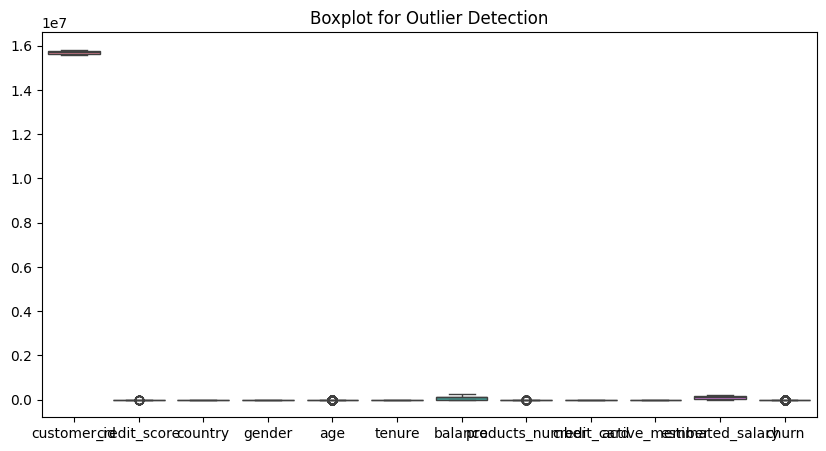

In [21]:
# Check for outliers

plt.figure(figsize=(10, 5))
sns.boxplot(data=data)
plt.title("Boxplot for Outlier Detection")
plt.show()

There is no outlier

In [22]:
# Check for skewness

'''
skewness = 0 → Perfectly symmetric
skewness > 0 → Right-skewed (long tail on the right, more small values)
skewness < 0 → Left-skewed (long tail on the left, more large values)
'''

# Checking for skewness

df = pd.DataFrame(data)

# Calculate skewness
skewness = df.skew()
print(skewness)

customer_id         0.001149
credit_score       -0.071607
country             0.500916
gender             -0.183596
age                 1.011320
tenure              0.010991
balance            -0.141109
products_number     0.745568
credit_card        -0.901812
active_member      -0.060437
estimated_salary    0.002085
churn               1.471611
dtype: float64


No columns with high skewness

In [23]:
# Print the highly skewed columns

from scipy.stats import skew

def detect_highly_skewed_columns(data, threshold=1.0):
    """
    Detects columns with high skewness (absolute skewness > threshold).

    Parameters:
        data (pd.DataFrame): The DataFrame to check.
        threshold (float): The skewness threshold (default = 1.0 for high skewness).

    Returns:
        dict: A dictionary with column names as keys and their skewness values.
    """
    numerical_cols = data.select_dtypes(include=['number'])  # Select only numerical columns
    skew_values = numerical_cols.apply(lambda x: skew(x, nan_policy='omit'))  # Compute skewness
    highly_skewed = skew_values[abs(skew_values) > threshold]  # Filter highly skewed columns

    return highly_skewed.to_dict()  # Return as dictionary

# Detect highly skewed columns
highly_skewed_cols = detect_highly_skewed_columns(data)
print(highly_skewed_cols)

{'age': 1.0111685586628079, 'churn': 1.4713899141398699}


There is only two columns with skewness: 'age' and 'churn'

Skewness negatively affects the model. Before dealing with it, it is necessary to understand whether these two columns are normally distributed or not in order to choose the best technique to solve skewness

In [25]:
# Check the distribution of column age, whether it is normally distributed or not

from scipy.stats import shapiro

stat, p = shapiro(data['age'])
print(f'Statistic={stat}, p-value={p}')

if p > 0.05:
    print("Data looks normally distributed")
else:
    print("Data is NOT normally distributed")

Statistic=0.9441067968735424, p-value=1.3079365657693273e-51
Data is NOT normally distributed


In [26]:
# # Check the distribution of column churn, whether it is normally distributed or not

from scipy.stats import shapiro

stat, p = shapiro(data['churn'])
print(f'Statistic={stat}, p-value={p}')

if p > 0.05:
    print("Data looks normally distributed")
else:
    print("Data is NOT normally distributed")

Statistic=0.4939196781176004, p-value=6.62039536884788e-98
Data is NOT normally distributed


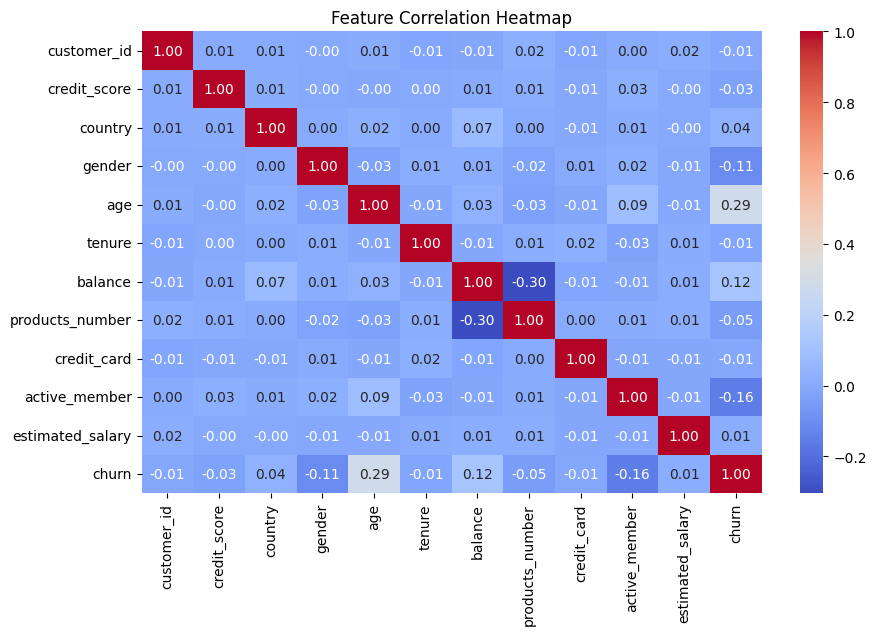

In [27]:
# Check for possible feature selection by understanding the relationship among the columns

plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

**6. Data Preparation**

In [28]:
# Separate features and target variable
X = data.drop(columns=["churn", "customer_id"])
y = data["churn"]

In [29]:
X.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [30]:
y.head()

,churn
0,1
1,0
2,1
3,0
4,0


In [31]:
# Fix the imbalance in the data

from imblearn.over_sampling import SMOTE

X_res, y_res = SMOTE().fit_resample(X, y)

In [32]:
y_res.value_counts()

,count
churn,
1,7963
0,7963


In [33]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=42)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12740, 10), (3186, 10), (12740,), (3186,))

In [43]:
# Scale the features in order to reduce variance

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
X_train

array([[-0.46799581, -0.88450127, -0.83939017, ...,  0.7725875 ,
        -0.76522099, -1.02519777],
       [ 1.09541714, -0.88450127,  1.19134109, ..., -1.29435177,
         1.30681204,  0.75082819],
       [-0.10720821,  1.75388463, -0.83939017, ...,  0.7725875 ,
        -0.76522099,  0.57379231],
       ...,
       [ 0.19891461, -0.88450127,  1.19134109, ...,  0.7725875 ,
        -0.76522099, -0.04853163],
       [-0.71945384, -0.88450127,  1.19134109, ..., -1.29435177,
        -0.76522099, -1.64638307],
       [ 0.52690334,  0.43469168,  1.19134109, ...,  0.7725875 ,
         1.30681204, -0.81136109]])

In [40]:
X_test

array([[-1.2442358 , -0.88450127, -0.83939017, ..., -1.29435177,
         1.30681204, -0.82649702],
       [-0.46799581,  0.43469168, -0.83939017, ...,  0.7725875 ,
        -0.76522099,  0.9755054 ],
       [ 0.34104306,  1.75388463, -0.83939017, ...,  0.7725875 ,
         1.30681204,  0.01452841],
       ...,
       [ 0.10051799, -0.88450127, -0.83939017, ..., -1.29435177,
        -0.76522099,  0.96142861],
       [ 1.1063501 ,  0.43469168, -0.83939017, ...,  0.7725875 ,
        -0.76522099,  0.45030583],
       [-0.43519694, -0.88450127, -0.83939017, ..., -1.29435177,
        -0.76522099,  0.18692056]])

**7. Model Selection**

In [41]:
def models(X_train, y_train):

    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression()
    log.fit(X_train, y_train)

    from sklearn import svm
    sv = svm.SVC()
    sv.fit(X_train, y_train)

    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)

    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)

    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier()
    forest.fit(X_train, y_train)

    from sklearn.ensemble import GradientBoostingClassifier
    gb = GradientBoostingClassifier()
    gb.fit(X_train, y_train)


    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    print('[1]SVM Classifier Training Accuracy:', sv.score(X_train, y_train))
    print('[2]K-Neighbors Classifier Training Accuracy:', knn.score(X_train, y_train))
    print('[3]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    print('[4]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
    print('[5]Gradient Boosting Classifier Training Accuracy:', gb.score(X_train, y_train))

    return log, sv, knn, tree, forest, gb

In [42]:
model = models(X_train, y_train)

[0]Logistic Regression Training Accuracy: 0.7723704866562009
[1]SVM Classifier Training Accuracy: 0.8480376766091052
[2]K-Neighbors Classifier Training Accuracy: 0.8740973312401884
[3]Decision Tree Classifier Training Accuracy: 1.0
[4]Random Forest Classifier Training Accuracy: 1.0
[5]Gradient Boosting Classifier Training Accuracy: 0.8444270015698587


**8. Model Evaluation**

In [44]:
from sklearn.metrics import classification_report

for i in range(len(model)):
    print('Model ', i)
    print(classification_report(y_test, model[i].predict(X_test)))
    print()

Model  0
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1633
           1       0.76      0.78      0.77      1553

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186


Model  1
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1633
           1       0.83      0.84      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186


Model  2
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1633
           1       0.80      0.84      0.82      1553

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82  

**9. Hypermeter Tuning**

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define Random Forest Model
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

# Hyperparameter Tuning
param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(rf, param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train, y_train)

# Train Final Model with Best Parameters
best_params = random_search.best_params_
rf_optimized = RandomForestClassifier(**best_params, random_state=42)
rf_optimized.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

**10. Feature Importance**

In [46]:
# Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_optimized.feature_importances_})
print(feature_importances.sort_values(by='Importance', ascending=False))

            Feature  Importance
3               age    0.229513
9  estimated_salary    0.123586
5           balance    0.121200
0      credit_score    0.114231
8     active_member    0.109014
6   products_number    0.096182
4            tenure    0.071049
2            gender    0.069905
1           country    0.047028
7       credit_card    0.018292


**11. Implimentation of feature Importance and Hypermeter Tuning**

In [47]:
# Split features and target based on Feature Importance
X2 = data.drop(columns=["churn", "customer_id", "credit_card"])
y2 = data["churn"]  # Target variable

In [48]:
X2.head()

,credit_score,country,gender,age,tenure,balance,products_number,active_member,estimated_salary
0,619,0,0,42,2,0.00,1,1,101348.88
1,608,2,0,41,1,83807.86,1,1,112542.58
2,502,0,0,42,8,159660.80,3,0,113931.57
3,699,0,0,39,1,0.00,2,0,93826.63
4,850,2,0,43,2,125510.82,1,1,79084.10


In [49]:
y2.head()

,churn
0,1
1,0
2,1
3,0
4,0


In [50]:
# Feature scaling
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X2)

In [51]:
X_scaled2

array([[-0.32622142, -0.90188624, -1.09598752, ..., -0.91158349,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -0.91158349,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  2.52705662,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -0.91158349,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.80773656,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ..., -0.91158349,
        -1.03067011, -1.07636976]])

In [52]:
# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled2, y2)

In [53]:
y_resampled.value_counts()

,count
churn,
1,7963
0,7963


In [54]:
# Train-Test Split
X2_train, X2_test, y2_train, y2_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [55]:
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((12740, 9), (3186, 9), (12740,), (3186,))

In [56]:
# Hyperparameter Tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [10, 20, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
random_search = RandomizedSearchCV(rf, param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X2_train, y2_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 50, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, scoring='accuracy')

In [57]:
# Get Best Parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': False}


In [58]:
# 🚀 Step 7: Train Final Model with Best Parameters
rf_optimized = RandomForestClassifier(**best_params, random_state=42)
rf_optimized.fit(X2_train, y2_train)

RandomForestClassifier(bootstrap=False, max_depth=50, random_state=42)

In [59]:
# Model Evaluation
y_pred2 = rf_optimized.predict(X2_test)

In [60]:
# Accuracy Score
accuracy = accuracy_score(y2_test, y_pred2)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8949


In [61]:
# Classification Report
print("Classification Report:\n", classification_report(y2_test, y_pred2))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      1593
           1       0.90      0.89      0.89      1593

    accuracy                           0.89      3186
   macro avg       0.89      0.89      0.89      3186
weighted avg       0.89      0.89      0.89      3186

